In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def check_null(data):
    data.isnull().sum()

In [4]:
# prints the correlation matrix of the dataframe
def correlation_matrix(data):
    correlation = data.corr()
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [5]:
def remove_outliers(data, field="rtt_max"):
    print("The initial distribution is: ")
    # sns.histplot(data[field], bins=20, kde=True)
    sns.histplot(data[field])
    plt.show()

    num_rows = data.shape[0]
    
    # Apply Tukey's rule to filter

    # Calculate Interqaurtile Range
    Q1 = data[field].quantile(0.25)
    Q3 = data[field].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR  # Calulate lower boundry of filter
    upper_lim = Q3 + 1.5 * IQR  # Calulate upper boundry of filter

    # Apply filter to rtt_max vector, getting the outliers indices
    outliers_low = (data[field] < lower_lim)
    outliers_up =  (data[field] > upper_lim)
    num_outliers = len(data[field][(outliers_low | outliers_up)])
    percentage_outliers = 100 * (num_outliers/num_rows)

    print(f"Found {round(percentage_outliers, 2)}% outliers in the data")

    # removing outliers from the data 
    latency_rtt_max_no_outliers = data[field][~(outliers_low | outliers_up)]
    latency_rtt_max_no_outliers=latency_rtt_max_no_outliers[latency_rtt_max_no_outliers!=0] # ignore values with 0 rtt time

    print("The filtered distribution is: ")
    # sns.histplot(latency_rtt_max_no_outliers, bins=20, kde=True)
    sns.histplot(latency_rtt_max_no_outliers)
    plt.show()

    sns.boxplot(latency_rtt_max_no_outliers)
    plt.show()

    # data[field] = latency_rtt_max_no_outliers # TODO return the dataframe with the outliers removed
    # return data

# Analyze rtt_max in udplatency table

The initial distribution is: 


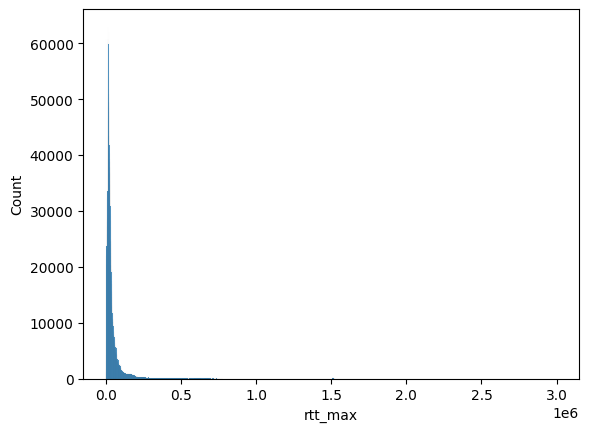

Found 11.28% outliers in the data
The filtered distribution is: 


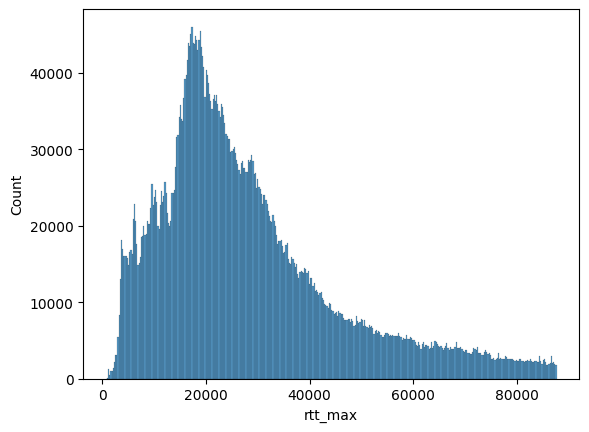

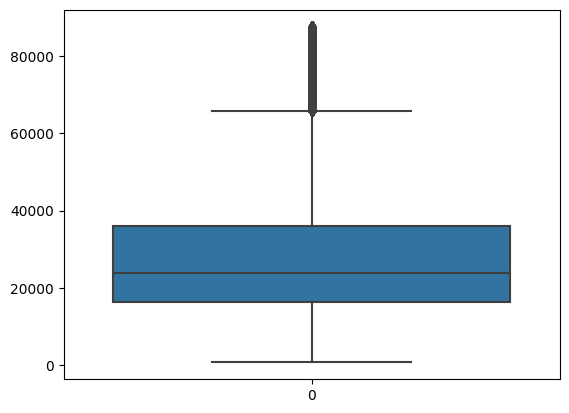

In [6]:
# analyze rtt_max in udplatency table
data = pd.read_csv("./202201/curr_udplatency.csv")
# correlation_matrix(data)
remove_outliers(data)

# Analyze rtt_max in dlping table

The initial distribution is: 


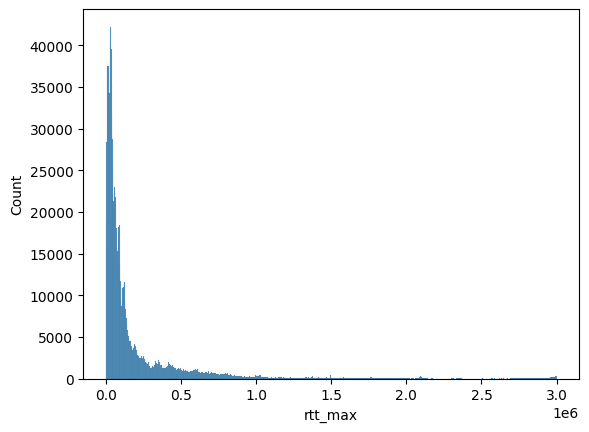

Found 13.97% outliers in the data
The filtered distribution is: 


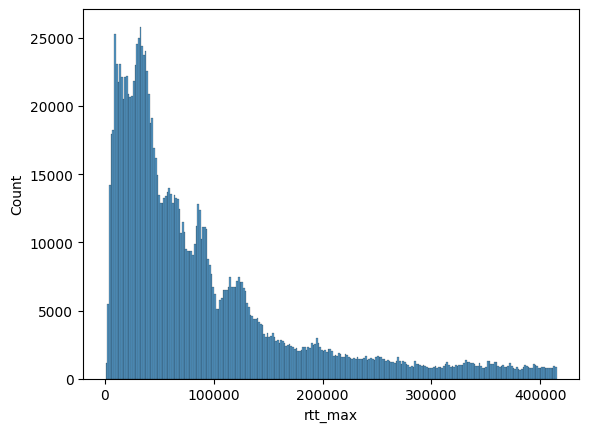

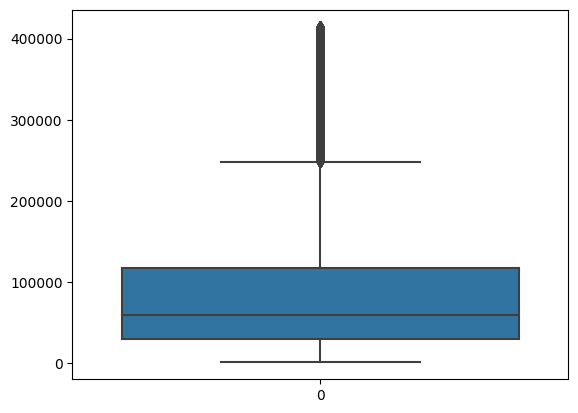

In [7]:
data = pd.read_csv("./202201/curr_dlping.csv")
# correlation_matrix(data)
check_null(data)
remove_outliers(data)

# Analyze rtt_max in ulping table

The initial distribution is: 


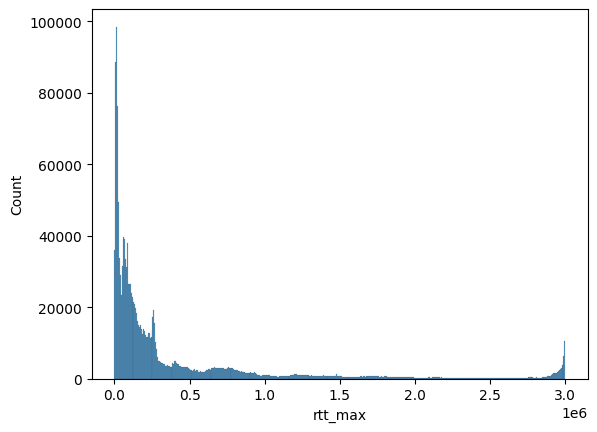

Found 12.0% outliers in the data
The filtered distribution is: 


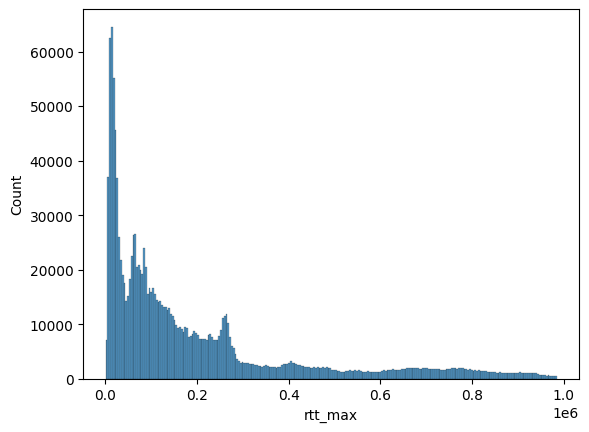

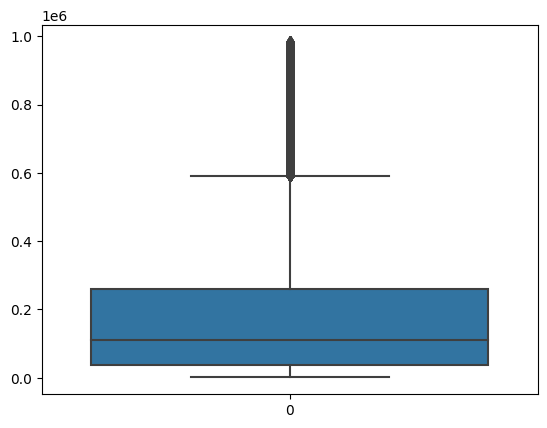

In [8]:
data = pd.read_csv("./202201/curr_ulping.csv")
# correlation_matrix(data)
check_null(data)
remove_outliers(data)

# Analyze rtt_max in ping table

The initial distribution is: 


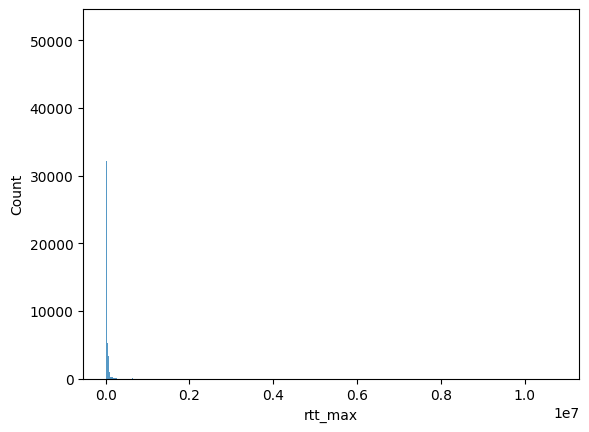

Found 8.74% outliers in the data
The filtered distribution is: 


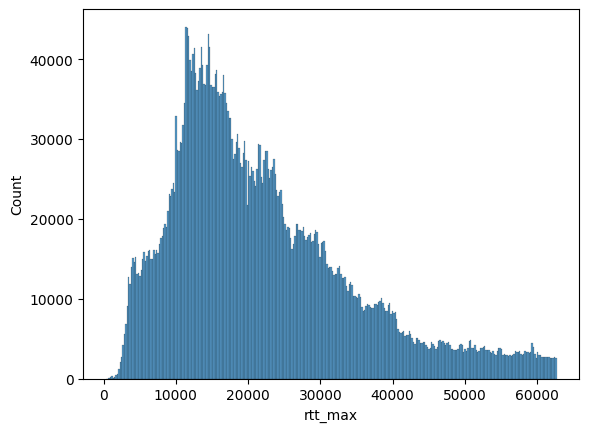

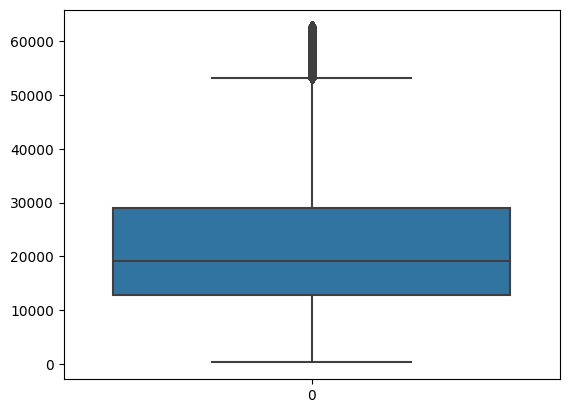

In [9]:
data = pd.read_csv("./202201/curr_ping.csv")
# correlation_matrix(data)
check_null(data)
remove_outliers(data)